In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from energy_consumption.feature_selection.collect import dummy_mapping, political_instability, weather_sunhours, weather_tempandwind, production_index, prices, population
from energy_consumption.feature_selection.extract import extract_all_features

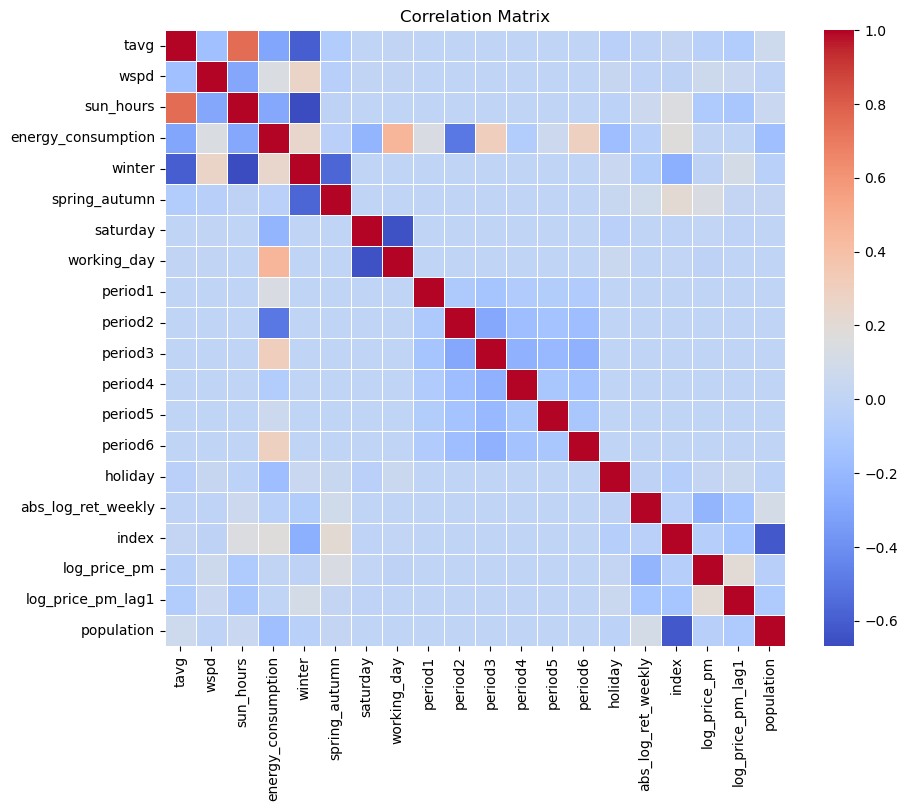

In [2]:
energydata = extract_all_features.get_energy_and_features()

# Assuming energydata is your DataFrame
correlation_matrix = energydata.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [3]:
correlation_matrix

,tavg,wspd,sun_hours,energy_consumption,winter,spring_autumn,saturday,working_day,period1,period2,period3,period4,period5,period6,holiday,abs_log_ret_weekly,index,log_price_pm,log_price_pm_lag1,population
tavg,1.000000,-0.158881,0.746491,-0.298343,-0.601383,-0.074817,-0.003655,0.003708,0.000068,-0.000124,0.000154,0.000047,7.577195e-06,-0.000104,-3.124955e-02,-0.008572,0.020603,-0.041004,-7.048479e-02,0.068818
wspd,-0.158881,1.000000,-0.293502,0.145287,0.262414,-0.049357,0.006193,0.008291,0.000026,-0.000047,0.000059,0.000018,2.887376e-06,-0.000040,3.279648e-02,-0.005579,-0.016345,0.066067,4.668479e-02,-0.006134
sun_hours,0.746491,-0.293502,1.000000,-0.289896,-0.668677,-0.010555,0.000117,-0.000210,0.000057,-0.000103,0.000129,0.000040,6.320723e-06,-0.000087,-2.013182e-02,0.061271,0.149135,-0.083783,-1.105556e-01,0.043708
energy_consumption,-0.298343,0.145287,-0.289896,1.000000,0.242311,-0.032753,-0.222889,0.457103,0.136657,-0.494734,0.307036,-0.069861,5.924509e-02,0.290982,-1.727875e-01,-0.037133,0.177411,0.005217,5.426315e-04,-0.164946
winter,-0.601383,0.262414,-0.668677,0.242311,1.000000,-0.566876,0.001947,-0.003016,0.000025,-0.000046,0.000057,0.000018,2.798086e-06,-0.000039,4.593693e-02,-0.068587,-0.249541,-0.011523,1.054624e-01,-0.040101
spring_autumn,-0.074817,-0.049357,-0.010555,-0.032753,-0.566876,1.000000,-0.001707,0.000887,-0.000044,0.000081,-0.000101,-0.000031,-4.935977e-06,0.000068,3.798138e-02,0.086967,0.205235,0.133226,1.883264e-02,0.018816
saturday,-0.003655,0.006193,0.000117,-0.222889,0.001947,-0.001707,1.000000,-0.645513,0.000018,-0.000033,0.000041,0.000013,2.034566e-06,-0.000028,-3.157044e-02,0.000077,-0.008084,0.010353,-7.943041e-03,0.000083
working_day,0.003708,0.008291,-0.000210,0.457103,-0.003016,0.000887,-0.645513,1.000000,-0.000028,0.000051,-0.000064,-0.000020,-3.151857e-06,0.000043,4.890750e-02,-0.000119,0.011913,-0.012271,1.083351e-03,-0.001042
period1,0.000068,0.000026,0.000057,0.136657,0.000025,-0.000044,0.000018,-0.000028,1.000000,-0.093250,-0.133771,-0.078798,-6.286185e-02,-0.078810,8.320926e-06,0.000039,0.000088,0.000056,-8.848504e-06,-0.000079
period2,-0.000124,-0.000047,-0.000103,-0.494734,-0.000046,0.000081,-0.000033,0.000051,-0.093250,1.000000,-0.286971,-0.169041,-1.348535e-01,-0.169067,-1.509815e-05,-0.000071,-0.000160,-0.000101,1.605440e-05,0.000144


delete 
* autumn dummy, cluster 2
* correlation between features not higher than 0.8 --> ok
log-transform 
* price  --> didn't change anything
* close_weekly --> didn't change anything
engineer 
* add abs_log_return with volatility_weekly, check if correlation is higher --> dint't change anything

Problem: 
* population and production index: correlation = 0.8

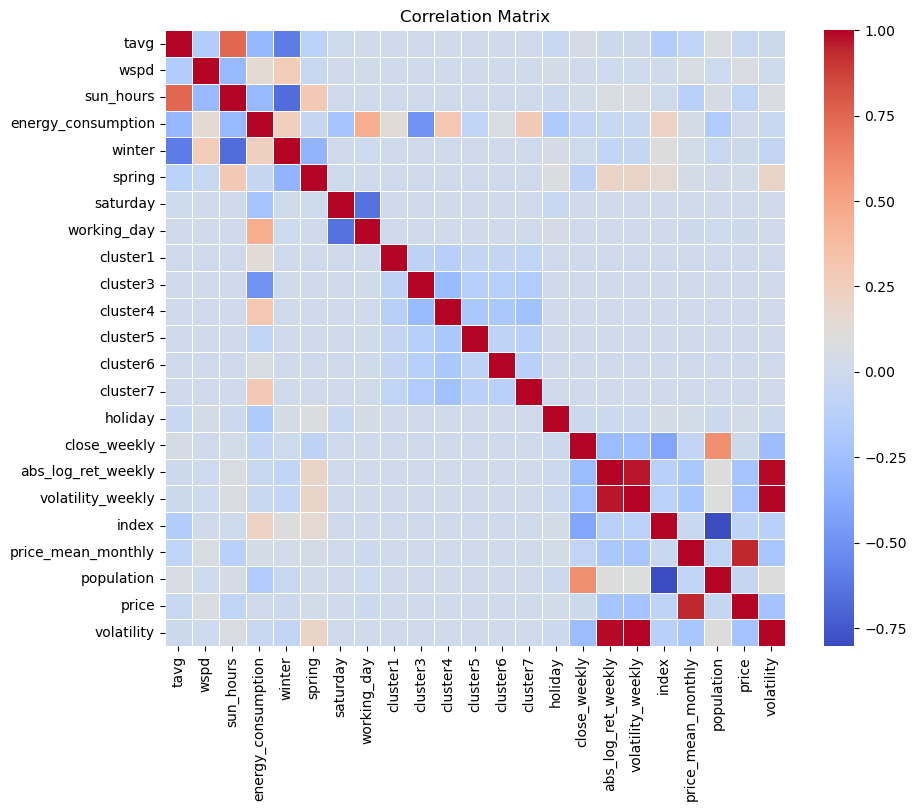

In [14]:
energydata2 = energydata.drop(columns=['autumn', 'cluster2'])
energydata2['price'] = energydata2['price_mean_monthly'].apply(lambda x: np.log1p(x))
energydata2 = energydata2.assign(
    volatility=lambda energydata2: energydata2.abs_log_ret_weekly + energydata2.volatility_weekly)

correlation_matrix2 = energydata2.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=False,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

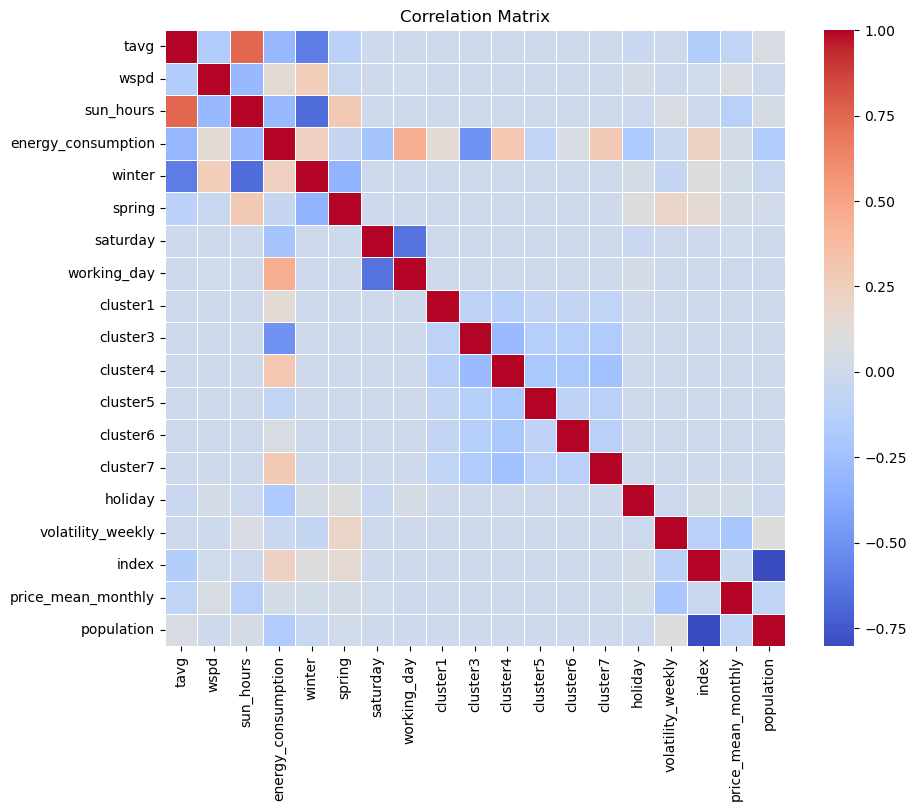

In [42]:
correlation_matrix2
energydata3 = energydata2.drop(columns=['close_weekly', 'abs_log_ret_weekly', 'volatility', 'price'])

correlation_matrix3 = energydata3.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=False,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

After this: Changed dummy mapping to 6 clusters, season mapping only to winter and summer

Drop 
* close_weekly --> Interpretation macht kein Sinn, hingegen bei abs log ret weekly schon: höhere Volatilität (politische Unsicherheit) verringert Enerieverbrauch und NAchfrage nach Energie 
* autumn --> Korrelation zu marginal, in summer integrieren als Referenzdummy

# Standardization and Normalization 
--> high variance, different scales 

In [43]:
energydata3.var()

tavg                   55.670130
wspd                   52.823507
sun_hours               7.959374
energy_consumption     98.978513
winter                  0.182211
spring                  0.190223
saturday                0.122429
working_day             0.204059
cluster1                0.039923
cluster3                0.138911
cluster4                0.206581
cluster5                0.076389
cluster6                0.076389
cluster7                0.109394
holiday                 0.032216
volatility_weekly       0.484671
index                  39.942487
price_mean_monthly    995.253641
population              0.407180
dtype: float64

Very different standard deviations; but need for standardization depends on model to use 
--> only standardize price_mean_montly

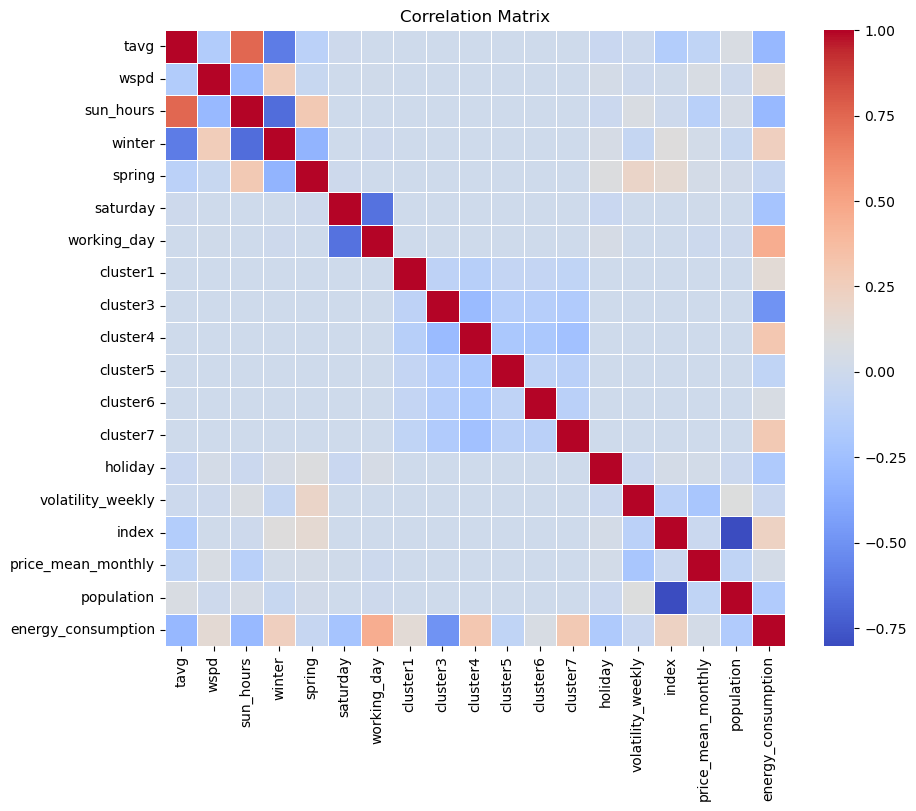

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Assuming X is your feature matrix (excluding the target variable 'energy_consumption')
X = energydata3.drop(columns=['energy_consumption'])
y = energydata3.reset_index()['energy_consumption']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on your data and transform the features
X_standardized = scaler.fit_transform(X)

X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized_df['energy_consumption'] = y

X_standardized_df.corr()

correlation_matrix4 = X_standardized_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix4, annot=False,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()